In [1]:
import numpy as np
import matplotlib.pyplot as plt

from stlpy.benchmarks import ReachAvoid
from stlpy.solvers import *

         Install drake (https://drake.mit.edu/installation.html)
         to use the Drake-based solvers.


In [2]:

# Specification Parameters
goal_bounds = (7,8,8,9)     # (xmin, xmax, ymin, ymax)
obstacle_bounds = (3,5,4,6)
T = 10

# Define the system and specification
scenario = ReachAvoid(goal_bounds, obstacle_bounds, T)
spec = scenario.GetSpecification()
sys = scenario.GetSystem()

# Specify any additional running cost (this helps the numerics in
# a gradient-based method)
Q = 1e-1*np.diag([0,0,1,1])   # just penalize high velocities
R = 1e-1*np.eye(2)

# Initial state
x0 = np.array([1.0,2.0,0,0])


In [3]:

# Choose a solver
solver = GurobiMICPSolver(spec, sys, x0, T, robustness_cost=True)
#solver = DrakeMICPSolver(spec, sys, x0, T, robustness_cost=True)
#solver = DrakeSos1Solver(spec, sys, x0, T, robustness_cost=True)
#solver = DrakeSmoothSolver(spec, sys, x0, T, k=2.0)
#solver = ScipyGradientSolver(spec, sys, x0, T)

# Set bounds on state and control variables
u_min = np.array([-0.5,-0.5])
u_max = np.array([0.5, 0.5])
x_min = np.array([0.0, 0.0, -1.0, -1.0])
x_max = np.array([10.0, 10.0, 1.0, 1.0])
#solver.AddControlBounds(u_min, u_max)
#solver.AddStateBounds(x_min, x_max)

# Add quadratic running cost (optional)
solver.AddQuadraticCost(Q,R)

# Solve the optimization problem
x, u, _, _ = solver.Solve()


Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-29
Setting up optimization problem...
Setup complete in 0.30848193168640137 seconds.
<class 'gurobipy.MQuadExpr'>
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 401 rows, 378 columns and 967 nonzeros
Model fingerprint: 0xde19e6a7
Model has 44 quadratic objective terms
Variable types: 290 continuous, 88 integer (88 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+00]
  QObjective range [2e-01, 2e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 283 rows and 276 columns
Presolve time: 0.00s
Presolved: 118 rows, 102 columns, 367 nonzeros
Presolved model has 40 quadratic objective terms
Variable types: 57 contin

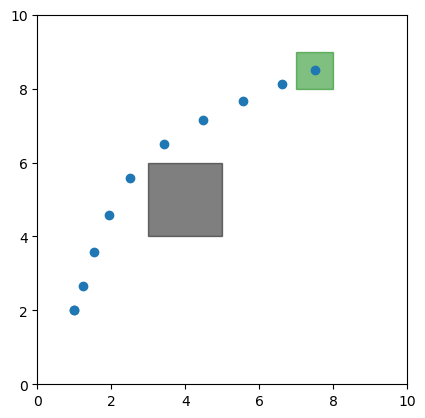

In [4]:

if x is not None:
    # Plot the solution
    ax = plt.gca()
    scenario.add_to_plot(ax)
    plt.scatter(*x[:2,:])
    plt.show()